In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

In [3]:
r_1 = 10 * 10**3
r_2 = 2 * r_1
c_1 = 100 * 10**-9
c_2 = c_1

K = 2

w = 1 / np.sqrt(r_1 * r_2 * c_1 * c_2)
fc = w / (2 * np.pi)
zeta = np.sqrt((r_2*c_2)/(r_1*c_1)) + np.sqrt((r_1*c_2)/(r_2*c_1)) + (1 - K) * np.sqrt((r_1*c_1)/(r_2*c_2))
Q = 1 / (zeta)
den = r_1 * c_1 + r_2 * c_2 + r_1 * c_2 * (1 - K)
Q_ = np.sqrt(r_1 * r_2 * c_1 * c_2)/(den)
Q__ = (1 / (3 - K)) * np.sqrt((c_1 * r_2) / (c_2 * r_1))

print("fc = ", fc)
print("Q = ", Q)
print("Q_ = ", Q_)
print("Q__ = ", Q__)


fc =  112.53953951963825
Q =  0.7071067811865474
Q_ =  0.7071067811865476
Q__ =  1.4142135623730951


In [11]:
df = pd.read_csv("Freq Resp.csv")
df["Gain"] = df["V_out [V]"] / df["V_in [V]"]
df["Gain [dB]"] = 20 * np.log10(df["Gain"])

df

,Frequency [Hz],V_in [V],V_out [V],Gain,Gain [dB]
0,1,1.03,2.11,2.048544,6.228905
1,2,1.05,2.13,2.028571,6.143806
2,4,1.05,2.11,2.009524,6.061863
3,8,1.05,2.04,1.942857,5.768817
4,16,1.05,2.04,1.942857,5.768817
5,20,1.05,2.11,2.009524,6.061863
6,30,1.05,2.11,2.009524,6.061863
7,40,1.05,2.11,2.009524,6.061863
8,50,1.05,2.09,1.990476,5.979140
9,60,1.05,2.05,1.952381,5.811291


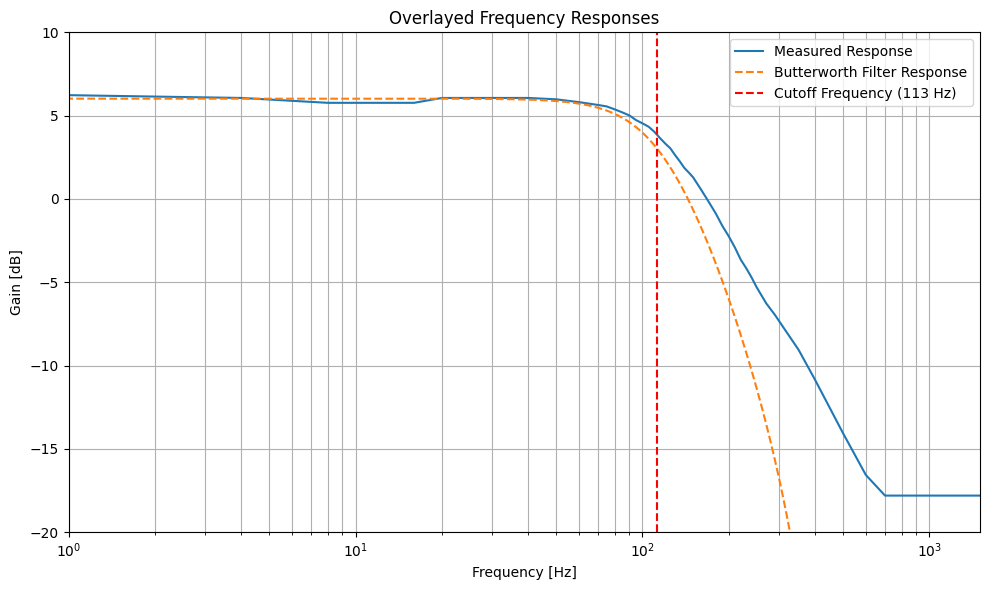

In [ ]:
order = 2   # Filter order
fs = 1000   # Sampling frequency in Hz

# Normalize the cutoff frequency (relative to Nyquist frequency)
cutoff_norm = fc / (fs / 2)

# Design the Butterworth filter
b, a = butter(order, cutoff_norm, btype='low', analog=False)

# Compute the frequency response
w, h = freqz(b, a, worN=1000)
h = 2 * h # Gain of 2

# Convert from rad/sample to Hz: f = (w / (2π)) * fs
freqs = w * fs / (2 * np.pi)

plt.figure(figsize=(10, 6))
plt.semilogx(df["Frequency [Hz]"], df["Gain [dB]"], label="Measured Response")
plt.semilogx(freqs, 20 * np.log10(np.abs(h)), label="Butterworth Filter Response", linestyle='dashed')
plt.axvline(fc, color='red', linestyle='--', label=f'Cutoff Frequency ({round(fc)} Hz)')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Gain [dB]")
plt.xlim(1, 1500)
plt.ylim(-20, 10)
plt.title("Overlayed Frequency Responses")
plt.legend()
plt.grid(which='both')
plt.tight_layout()
plt.savefig("report/assets/frequency_response.png")